<img src="https://www.reliance-project.eu/wp-content/uploads/2021/03/Asset-8mdpi.svg" width="250" align="left" height=100 />
<img src="https://git.man.poznan.pl/stash/projects/ROHUB/repos/rohub-api/browse/rohub_logo.png?raw=" width="250" align="right" height=100 />

# Impact of the Covid-19 Lockdown on Air and Water quality in the Venice Lagoon

In [3]:
pip install rohub rioxarray cmcrameri pooch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 452.5 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import rohub
import pooch

import numpy as np
import xarray as xr
import rioxarray

import pandas as pd

import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

# ROHub Login

In [5]:
rohub_user = open(os.path.join(os.environ['HOME'],"rohub-user")).read().rstrip()
rohub_pwd = open(os.path.join(os.environ['HOME'],"rohub-pwd")).read().rstrip()
rohub.login(username=rohub_user, password=rohub_pwd)

Logged successfully as annef@simula.no.


# Find and load the first RO

In [7]:
all_ros = rohub.ros_find()
anne_ros = all_ros[all_ros.owner == 'annef@simula.no']
anne_ros

,identifier,title,description,type,research_areas,status,created_on,created_by,modified_on,access_mode,...,main_entity,communities,score,keywords,domains,places,organizations,persons,concepts,shared_link
0,2edcfa66-0f59-42f4-aa29-1c5681466424,Global Fish Tracking System (GFTS): a Destinat...,**Use Case topic**: The goal of this use case ...,Executable Research Object,"[Applied sciences, Environmental research, Oce...",LIVE,2023-11-28T14:53:38.668993+00:00,annef@simula.no,2023-11-28T14:53:39.316827+00:00,PUBLIC,...,[],[Pangeo],0.0,[{'name': 'fish'}],[],NaN,[],NaN,[],https://w3id.org/ro-id/2edcfa66-0f59-42f4-aa29...
1,80e2215b-49cb-456e-9ae9-803f3bcdbba3,Pangeo & OpenEO Joint tutorial for BiDS23,BiDS - Big Data from Space\n\nBig Data from Sp...,Basic Research Object,"[Applied sciences, Earth observation]",LIVE,2023-11-13T10:17:11.523094+00:00,annef@simula.no,2023-11-13T10:17:12.283698+00:00,PUBLIC,...,[],[],0.0,[],"[{'name': 'meteorology', 'score': '1.4', 'norm...",NaN,"[{'name': 'European Union', 'wikidata': 'https...",NaN,"[{'name': 'prediction', 'score': '3.5', 'normS...",https://w3id.org/ro-id/80e2215b-49cb-456e-9ae9...
3,073ab8fc-67b3-4ec7-915e-17ffb47f09c5,FIP convergence Matrix Year 2022,This Research Object contains all the data use...,Data-centric Research Object,[Applied sciences],LIVE,2023-10-06T07:11:17.444701+00:00,annef@simula.no,2023-10-06T07:11:18.237212+00:00,PUBLIC,...,[],[],0.0,"[{'name': 'FIP'}, {'name': 'FAIR'}]","[{'name': 'computer science', 'score': '6.6', ...",NaN,[],NaN,"[{'name': 'convergence', 'score': '6.3', 'norm...",https://w3id.org/ro-id/073ab8fc-67b3-4ec7-915e...
48,a66bbb17-5bfa-4ba1-9199-712bdfbd6b2a,Tips and Approaches for collaboratively develo...,This Research Object has as a main artefact a ...,Bibliography-centric Research Object,[Applied sciences],LIVE,2023-07-27T11:55:15.799692+00:00,annef@simula.no,2023-07-27T12:22:28.038218+00:00,PUBLIC,...,[],[],0.0,"[{'name': 'community'}, {'name': 'backward des...","[{'name': 'education', 'score': '2.1', 'normSc...",NaN,[],NaN,"[{'name': 'approach', 'score': '3.3', 'normSco...",https://w3id.org/ro-id/a66bbb17-5bfa-4ba1-9199...
49,d8fae2d3-7277-454b-b663-f8cd5d82b001,Tips and Approaches for collaboratively develo...,This Research Object has as a main artefact a ...,Bibliography-centric Research Object,[Applied sciences],SNAPSHOT,2023-07-27T12:22:06.899665+00:00,annef@simula.no,2023-07-27T12:22:28.965275+00:00,PUBLIC,...,[],[],0.0,"[{'name': 'community'}, {'name': 'backward des...","[{'name': 'education', 'score': '2.1', 'normSc...",NaN,[],NaN,"[{'name': 'approach', 'score': '3.3', 'normSco...",https://w3id.org/ro-id/d8fae2d3-7277-454b-b663...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,a05fff1d-b9bd-4295-bf58-a33125a1d926,PM10 in Norway Jupyter notebook demonstrating ...,This Research Object demonstrates how to use C...,Executable Research Object,[Earth sciences],LIVE,2022-01-23T21:00:01.007009+00:00,annef@simula.no,2023-01-17T20:16:55.052642+00:00,PUBLIC,...,[],[],0.0,"[{'name': 'norway'}, {'name': 'PM10'}, {'name'...",[{'name': 'ecology'}],NaN,[],NaN,[],https://w3id.org/ro-id/a05fff1d-b9bd-4295-bf58...
1611,0d5a0619-14d5-4b45-b925-a9432684f76a,Jupyter notebook demonstrating the usage of CA...,This Research Object demonstrates how to use C...,Executable Research Object,[Earth sciences],SNAPSHOT,2022-01-18T18:30:54.174269+00:00,annef@simula.no,2023-01-17T20:16:49.519772+00:00,PUBLIC,...,[],[],0.0,[],[],NaN,[],NaN,[],https://w3id.org/ro-id/0d5a0619-14d5-4b45-b925...
1625,d767e6c3-6cfd-4e68-a989-0b4cbe9236b5,Identification of sources of pollution events ...,Trajectory model (backwards) such as FLEXPART ...,Executable Research Object,"[Applied sciences, Meteorology]",LIVE,2021-12-20T11:33:30.052359+00:00,annef@simula.no,2023-01-17T20:16:48.929604+00:00,PUBLIC,...,[],[],0.0,"[{'name': 'modelling'}, {'name': 'atmospheric ...",[],NaN,[],NaN,[],https://w3id.org/ro-id/d767e6c3-6cfd-4e68-a989...
1626,5f2e7ab8-8

### Load RO "Impact of the Covid-19 Lockdown on Air quality"

In [8]:
loaded_ro_id = '53aa90bf-c593-4e6d-923f-d4711ac4b0e1'
ro=rohub.ros_load(identifier=loaded_ro_id)

Research Object was successfully loaded with id = 53aa90bf-c593-4e6d-923f-d4711ac4b0e1


In [9]:
ro_resources = rohub.ros_list_resources(identifier = loaded_ro_id)

In [10]:
ro_resources

,identifier,type,source,title,description,url,name,path,size,creator,created_on,modified_on,download_url
0,0fc39920-a4b1-40e6-8154-922c11648611,Software,external,Rendered jupyter notebook on impact of lockdow...,Rendered notebook showing the impact of the Co...,https://nordicesmhub.github.io/RELIANCE/scienc...,Rendered jupyter notebook on impact of lockdow...,https://nordicesmhub.github.io/RELIANCE/scienc...,NaN,annef@simula.no,2022-02-28T12:09:37.504067+0000,2022-02-28T12:09:38.028034+0000,https://api.rohub.org/api/resources/0fc39920-a...
1,14abf6e3-4ecc-462e-9aa4-4c8a925c304a,Jupyter Notebook,external,Impact of the lockdown on air quality (Jupyter...,Study the impact of the lockdown during the co...,https://raw.githubusercontent.com/NordicESMhub...,Impact of the lockdown on air quality (Jupyter...,https://raw.githubusercontent.com/NordicESMhub...,NaN,annef@simula.no,2022-05-29T20:03:12.795653+0000,2022-06-01T14:35:47.916370+0000,https://api.rohub.org/api/resources/14abf6e3-4...
2,1d453d7c-72a5-4b23-88a1-4b34fc73a0b0,Data Cube Collection,external,CAMS European air quality forecasts: NO2,CAMS NITROGEN DIOXIDE,https://reliance.adamplatform.eu/?dataset=6962...,CAMS European air quality forecasts: NO2,https://reliance.adamplatform.eu/?dataset=6962...,NaN,annef@simula.no,2022-05-31T09:59:58.575398+0000,2022-10-21T17:40:36.922187+0000,https://api.rohub.org/api/resources/1d453d7c-7...
3,79d1e316-23f5-4d93-ba9c-b4e48c291797,Data Cube Collection,external,CAMS European air quality forecasts: O3,CAMS OZONE,https://reliance.adamplatform.eu/?dataset=6962...,CAMS European air quality forecasts: O3,https://reliance.adamplatform.eu/?dataset=6962...,NaN,annef@simula.no,2022-10-21T14:38:13.978164+0000,2022-10-21T14:38:17.014060+0000,https://api.rohub.org/api/resources/79d1e316-2...
4,f39bd071-a179-4718-a36f-c8bc1cbe3072,Data Cube Collection,external,CAMS European air quality forecasts: PM25,CAMS SURFACE PARTICULATE METTER D<2.5,https://reliance.adamplatform.eu/?dataset=6962...,CAMS European air quality forecasts: PM25,https://reliance.adamplatform.eu/?dataset=6962...,NaN,annef@simula.no,2022-05-31T10:01:40.106991+0000,2022-10-21T17:33:46.237193+0000,https://api.rohub.org/api/resources/f39bd071-a...
5,e5bcb8af-fcbc-4173-8a10-7501a02db5ab,Dataset,external,"NO2 CAMS over Europe March-June 2019, 2020 and...","NO2 CAMS over Europe March-June 2019, 2020 and...",https://zenodo.org/record/7513765/files/NO2_EU...,"NO2 CAMS over Europe March-June 2019, 2020 and...",https://zenodo.org/record/7513765/files/NO2_EU...,NaN,annef@simula.no,2023-01-08T14:47:29.354507+0000,2023-01-08T14:47:31.746084+0000,https://api.rohub.org/api/resources/e5bcb8af-f...
6,25c2aa47-dc11-41b4-ad96-b516e66c628a,Dataset,external,"O3 CAMS over Europe March-June 2019, 2020 and ...","O3 CAMS over Europe March-June 2019, 2020 and ...",https://zenodo.org/record/7513765/files/O3_EUR...,"O3 CAMS over Europe March-June 2019, 2020 and ...",https://zenodo.org/record/7513765/files/O3_EUR...,NaN,annef@simula.no,2023-01-08T14:42:05.557815+0000,2023-01-08T14:42:11.840908+0000,https://api.rohub.org/api/resources/25c2aa47-d...
7,d813c1f0-667a-49f5-996a-9226b922f39b,Dataset,external,"PM10 CAMS over Europe March-June 2019, 2020 an...","PM10 CAMS over Europe March-June 2019, 2020 an...",https://zenodo.org/record/7513765/files/PM10_E...,"PM10 CAMS over Europe March-June 2019, 2020 an...",https://zenodo.org/record/7513765/files/PM10_E...,NaN,annef@simula.no,2023-01-08T14:46:00.841743+0000,2023-01-08T14:46:02.707416+0000,https://api.rohub.org/api/resources/d813c1f0-6...
8,1afcaec9-3b79-42d4-bb87-4349579eaac2,Dataset,external,"PM2.5 CAMS over Europe March-June 2019, 2020 a...","PM2.5 CAMS over Europe March-June 2019, 2020 ...",https://zenodo.org/record/7513765/files/PM2_5_...,"PM2.5 CAMS over Europe March-June 2019, 2020 a...",https://zenodo.org/record/7513765/files/PM2_5_...,NaN,annef@simula.no,2023-01-08T14:43:48.246969+0000,2023-01-08T14:44:24.439601+0000,https://api.rohub.org/api/resources/1afcaec9-3

### Get dataset for further reuse

In [11]:
list_dataset = ro_resources.loc[ro_resources['type'] == 'Dataset']
list_dataset

,identifier,type,source,title,description,url,name,path,size,creator,created_on,modified_on,download_url
5,e5bcb8af-fcbc-4173-8a10-7501a02db5ab,Dataset,external,"NO2 CAMS over Europe March-June 2019, 2020 and...","NO2 CAMS over Europe March-June 2019, 2020 and...",https://zenodo.org/record/7513765/files/NO2_EU...,"NO2 CAMS over Europe March-June 2019, 2020 and...",https://zenodo.org/record/7513765/files/NO2_EU...,NaN,annef@simula.no,2023-01-08T14:47:29.354507+0000,2023-01-08T14:47:31.746084+0000,https://api.rohub.org/api/resources/e5bcb8af-f...
6,25c2aa47-dc11-41b4-ad96-b516e66c628a,Dataset,external,"O3 CAMS over Europe March-June 2019, 2020 and ...","O3 CAMS over Europe March-June 2019, 2020 and ...",https://zenodo.org/record/7513765/files/O3_EUR...,"O3 CAMS over Europe March-June 2019, 2020 and ...",https://zenodo.org/record/7513765/files/O3_EUR...,NaN,annef@simula.no,2023-01-08T14:42:05.557815+0000,2023-01-08T14:42:11.840908+0000,https://api.rohub.org/api/resources/25c2aa47-d...
7,d813c1f0-667a-49f5-996a-9226b922f39b,Dataset,external,"PM10 CAMS over Europe March-June 2019, 2020 an...","PM10 CAMS over Europe March-June 2019, 2020 an...",https://zenodo.org/record/7513765/files/PM10_E...,"PM10 CAMS over Europe March-June 2019, 2020 an...",https://zenodo.org/record/7513765/files/PM10_E...,NaN,annef@simula.no,2023-01-08T14:46:00.841743+0000,2023-01-08T14:46:02.707416+0000,https://api.rohub.org/api/resources/d813c1f0-6...
8,1afcaec9-3b79-42d4-bb87-4349579eaac2,Dataset,external,"PM2.5 CAMS over Europe March-June 2019, 2020 a...","PM2.5 CAMS over Europe March-June 2019, 2020 ...",https://zenodo.org/record/7513765/files/PM2_5_...,"PM2.5 CAMS over Europe March-June 2019, 2020 a...",https://zenodo.org/record/7513765/files/PM2_5_...,NaN,annef@simula.no,2023-01-08T14:43:48.246969+0000,2023-01-08T14:44:24.439601+0000,https://api.rohub.org/api/resources/1afcaec9-3...


In [12]:
filenames = []
for file in list(list_dataset['url']):
    tmpname = pooch.retrieve(
        url=file,
        known_hash=None,
        path=f".",
    )
    filenames.append(tmpname)

SHA256 hash of downloaded file: 6d74ba534aea93201b5e11349996f44bb56a2c241ceb16cce29f52d8b24629c0
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 3aac7017ea18125f5de13f73113f9ae428b9b807105808b0c91b596e313dfa0b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 46cf6946f0e4eb24d3d280df82e386aa4ee4c57a70db45e7a82f4f924b68b381
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: dcd3304e8da033351ab882ac127cde18e1fb4b8c887a306c07904d5443d9a866
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [13]:
dset = xr.open_mfdataset(filenames)
dset

<xarray.Dataset>
Dimensions:    (time: 366, latitude: 400, longitude: 700)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude   (latitude) float64 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * time       (time) datetime64[ns] 2019-03-01 2019-03-02 ... 2021-06-30
Data variables:
    NO2        (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    O3         (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    PM10       (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    PM2_5      (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    crs:            +init=epsg:4326
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

In [14]:
dset.rio.write_crs(4326, inplace=True)

<xarray.Dataset>
Dimensions:      (time: 366, latitude: 400, longitude: 700)
Coordinates:
  * longitude    (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude     (latitude) float64 69.95 69.85 69.75 ... 30.25 30.15 30.05
  * time         (time) datetime64[ns] 2019-03-01 2019-03-02 ... 2021-06-30
    spatial_ref  int64 0
Data variables:
    NO2          (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    O3           (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    PM10         (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    PM2_5        (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

### Extract data over the Venice Lagoon

In [15]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': [
          [
            [
              12.93005683439273,
              45.121595450302976
            ],
            [
              12.93005683439273,
              45.58647549643294
            ],
            [
              12.139027321203969,
              45.58647549643294
            ],
            [
              12.139027321203969,
              45.121595450302976
            ],
            [
              12.93005683439273,
              45.121595450302976
            ]
          ]
        ]
    }
]


clipped = dset.rio.clip(geometries)

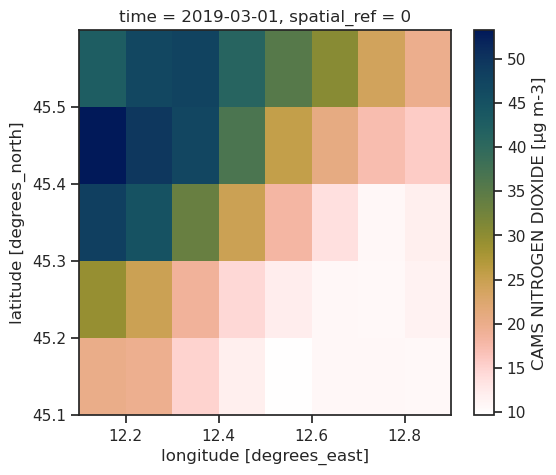

In [16]:
fig = plt.figure(1, figsize=[6, 5])
clipped.isel(time=0).NO2.plot(cmap=cmc.batlowW_r)

# Find and load the second RO

In [17]:
malek_ros = all_ros[all_ros.owner == 'malek.belgacem@ve.ismar.cnr.it']
malek_ros

,identifier,title,description,type,research_areas,status,created_on,created_by,modified_on,access_mode,...,main_entity,communities,score,keywords,domains,places,organizations,persons,concepts,shared_link
72,cf84e531-56d3-43ee-8362-c340d0addf30,Spatial distribution of Cold Water Corals (CWC...,This case study targets the Mediterranean cold...,Executable Research Object,[Applied sciences],LIVE,2023-06-06T10:11:53.841611+00:00,malek.belgacem@ve.ismar.cnr.it,2023-06-24T14:26:59.732299+00:00,PUBLIC,...,[],[],0.0,"[{'name': 'corals habitat'}, {'name': 'warming...","[{'name': 'hydrography', 'score': '6.7', 'norm...",NaN,[],NaN,"[{'name': 'species', 'score': '3.5', 'normScor...",https://w3id.org/ro-id/cf84e531-56d3-43ee-8362...
154,07e76ee3-fe6c-4fb1-903d-3a8c5236e51b,Quality check CTD profiles against Bottle data,This Jupyter notebook is a tool that can load ...,Basic Research Object,[Applied sciences],LIVE,2022-09-14T21:31:04.699938+00:00,malek.belgacem@ve.ismar.cnr.it,2022-09-22T09:59:46.307872+00:00,PUBLIC,...,[],[],0.0,"[{'name': 'oceanography'}, {'name': 'CTD profi...","[{'name': 'medicine', 'score': '3.1', 'normSco...",NaN,[],NaN,"[{'name': 'rosette', 'score': '3.1', 'normScor...",https://w3id.org/ro-id/07e76ee3-fe6c-4fb1-903d...
1698,0869e396-3733-4aff-8fb2-94c8937b28aa,Snapshot 2021 study case: Lockdown impacts on ...,This is a case study of snapshot project http:...,Data-centric Research Object,"[Biochemistry, Earth sciences, Oceanography]",LIVE,2021-11-29T14:45:39.803487+00:00,malek.belgacem@ve.ismar.cnr.it,2022-07-15T16:26:33.119790+00:00,PUBLIC,...,[],[SNAPSHOT: the pandemic and post-pandemic mari...,0.0,"[{'name': 'lockdown impact'}, {'name': 'Adriat...","[{'name': 'hydrography', 'score': '4.1', 'norm...",NaN,[],NaN,"[{'name': 'site', 'score': '3.0', 'normScore':...",https://w3id.org/ro-id/0869e396-3733-4aff-8fb2...


# Load the Resource

In [18]:
loaded_ro2_id = '0869e396-3733-4aff-8fb2-94c8937b28aa'
ro=rohub.ros_load(identifier=loaded_ro2_id)

Research Object was successfully loaded with id = 0869e396-3733-4aff-8fb2-94c8937b28aa


In [19]:
ro_resources2 = rohub.ros_list_resources(identifier = loaded_ro2_id)

In [20]:
ro_resources2[:]

,identifier,type,source,title,description,url,name,path,size,creator,created_on,modified_on,download_url
0,e1111c84-fe35-4380-84e2-09b388a71116,Dataset,external,PTF dataset(2009-2020)\nPiattaforma acqua allta,Data at the Acqua Alta oceanographic tower is ...,https://datahub.egi.eu/api/v3/onezone/shares/d...,PTF dataset(2009-2020)\nPiattaforma acqua allta,https://datahub.egi.eu/api/v3/onezone/shares/d...,NaN,malek.belgacem@ve.ismar.cnr.it,2022-11-29T15:26:53.739562+0000,2023-06-22T10:59:50.791762+0000,https://api.rohub.org/api/resources/e1111c84-f...
1,b03ad728-6be9-41ef-8652-0464fd478d21,Jupyter Notebook,external,Jupyter notebook using R,None,https://datahub.egi.eu/api/v3/onezone/shares/d...,Jupyter notebook using R,https://datahub.egi.eu/api/v3/onezone/shares/d...,NaN,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:38:45.256955+0000,2022-11-29T16:15:06.244156+0000,https://api.rohub.org/api/resources/b03ad728-6...
2,4306ef8c-a77c-47bb-82ec-a5e7fbb69b99,Paper,external,Dataset description,"In this paper, we describe a 50-year (1965–201...",https://doi.org/10.5194/essd-12-215-2020,Dataset description,https://doi.org/10.5194/essd-12-215-2020,NaN,malek.belgacem@ve.ismar.cnr.it,2022-11-29T16:05:17.920104+0000,2022-11-29T16:06:05.302894+0000,https://api.rohub.org/api/resources/4306ef8c-a...
3,4fafc868-5281-4795-bae1-4cd1a07ca59b,Dataset,external,Dataset source,The present database contains observations for...,https://zenodo.org/record/3516717#.YboDGWjMI2x,Dataset source,https://zenodo.org/record/3516717#.YboDGWjMI2x,NaN,malek.belgacem@ve.ismar.cnr.it,2022-11-29T16:06:59.179645+0000,2022-11-29T16:07:01.609968+0000,https://api.rohub.org/api/resources/4fafc868-5...
4,eaee63ca-aaa5-46eb-8b8a-0d696d1340e9,Sketch,internal,image.jfif,None,None,image.jfif,image.jfif,88174.0,malek.belgacem@ve.ismar.cnr.it,2022-07-15T16:29:07.183540+0000,2023-06-22T10:56:15.115165+0000,https://api.rohub.org/api/resources/eaee63ca-a...
5,28208669-c1ef-475e-85ac-8114691c154d,Sketch,internal,None,None,None,reliance deliv dec2021.png,reliance deliv dec2021.png,1049814.0,malek.belgacem@ve.ismar.cnr.it,2023-06-09T11:33:24.938835+0000,2023-06-09T11:33:25.669288+0000,https://api.rohub.org/api/resources/28208669-c...
6,1b950828-28e0-4725-abcb-73f33d0bf32e,File,internal,None,None,None,NO3_change_obsvspred2020.png,Output/NO3_change_obsvspred2020.png,26131.0,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:05:23.636780+0000,2021-12-22T14:05:23.638961+0000,https://api.rohub.org/api/resources/1b950828-2...
7,32f66214-fac2-44b8-af57-559916593747,File,internal,NO3_ts_ptf_decompose.png,None,None,NO3_ts_ptf_decompose.png,Output/NO3_ts_ptf_decompose.png,41569.0,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:06:14.381079+0000,2021-12-22T14:06:44.434429+0000,https://api.rohub.org/api/resources/32f66214-f...
8,548ed54f-2d96-4e0c-9633-cbb22a04fd20,File,internal,None,None,None,NO3_predict_obsvspred2020vs20092019.png,Output/NO3_predict_obsvspred2020vs20092019.png,55841.0,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:06:01.775038+0000,2021-12-22T14:06:01.777430+0000,https://api.rohub.org/api/resources/548ed54f-2...
9,aa6894c2-5c4d-4c39-817b-d63fb155141d,File,internal,None,None,None,NO3_predict_obsvspred2020.png,Output/NO3_predict_obsvspred2020.png,49353.0,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:05:43.603856+0000,2021-12-22T14:05:43.605820+0000,https://api.rohub.org/api/resources/aa6894c2-5...


In [21]:
loaded_res_id2 = ro_resources2.loc[0, 'identifier']
loaded_res2 = rohub.resource_load(identifier = loaded_res_id2)

Resource was successfully loaded with id = e1111c84-fe35-4380-84e2-09b388a71116


In [22]:
PTFfilename = pooch.retrieve(
        url=loaded_res2.download_url,
        known_hash=None,
        path=f".",
    )

SHA256 hash of downloaded file: 7b1373dde227c03422824381de62a3e1adf918a603957ad0c2f253d9d83df8ff
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [23]:
PTF = pd.read_csv(PTFfilename, sep = ";", index_col="DATE", infer_datetime_format=True, parse_dates=True)
PTF

,LON,LAT,BDEPTH,DEPTH,TEMP,SAL,DENS,O2per,O2mll,pH,CHLAa,TURB,NH3,NO2,NO3,SiO4,PO4,SECCHI,CHLA,PHAEO
DATE,,,,,,,,,,,,,,,,,,,,
2009-01-16,12.51,45.31,17,0.6,9.8540,37.6210,29.026,110.83000,9.87000,8.03,0.6700,1.8800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-16,12.51,45.31,17,1.5,9.8530,37.6310,29.035,111.29000,9.91000,8.03,0.7600,1.8300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-16,12.51,45.31,17,2.5,9.8570,37.6360,29.038,111.80000,9.95000,8.03,0.7200,1.9600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-16,12.51,45.31,17,3.4,9.8620,37.6220,29.026,112.23000,9.99000,8.03,0.8000,1.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-16,12.51,45.31,17,4.7,9.8610,37.6240,29.028,112.56000,10.02000,8.03,0.8900,1.8900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-11,12.51,45.31,17,13.5,13.9439,37.6827,NaN,94.00275,5.37532,NaN,1.2893,3.5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-11,12.51,45.31,17,14.0,13.9433,37.6963,NaN,94.04048,5.37709,NaN,1.3507,3.5856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-11,12.51,45.31,17,14.5,13.9543,37.7043,NaN,93.93828,5.36979,NaN,1.3928,3.3817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill missing values and compute monthly averages

In [24]:
PTF_fill = PTF.interpolate()
PTF_fill["year"] = PTF_fill.index.year
PTF_fill["month"] = PTF_fill.index.month

In [25]:
PTF_avg = PTF_fill.resample("M").mean()
PTF_avg

,LON,LAT,BDEPTH,DEPTH,TEMP,SAL,DENS,O2per,O2mll,pH,...,NH3,NO2,NO3,SiO4,PO4,SECCHI,CHLA,PHAEO,year,month
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-31,12.51,45.31,17.0,7.98125,9.798500,37.616875,29.03300,112.737500,10.050625,8.03625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,1.0
2009-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-31,12.51,45.31,17.0,8.01250,15.459563,32.923125,24.27375,118.106250,9.623750,8.24125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,12.51,45.31,17.0,8.25000,25.136727,35.421943,29.61150,103.467492,4.878006,8.03000,...,1.590,0.150,0.620,1.465,0.075,8.929839,0.840,0.55,2020.0,8.0
2020-09-30,12.51,45.31,17.0,8.25000,24.709397,36.092394,29.61150,102.726254,4.860642,8.03000,...,0.235,0.205,0.840,4.990,0.055,8.779839,0.895,0.55,2020.0,9.0
2020-10-31,12.51,45.31,17.0,8.25000,20.152960,36.783437,29.61150,100.054802,5.110311,8.03000,...,0.370,0.290,1.685,3.615,0.095,7.491667,0.805,0.55,2020.0,10.0


## Compare NO2 from Copernicus air quality forecasts and NO2 from water measurements

### Plot NO2 from water measurements over the Venice lagoon

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


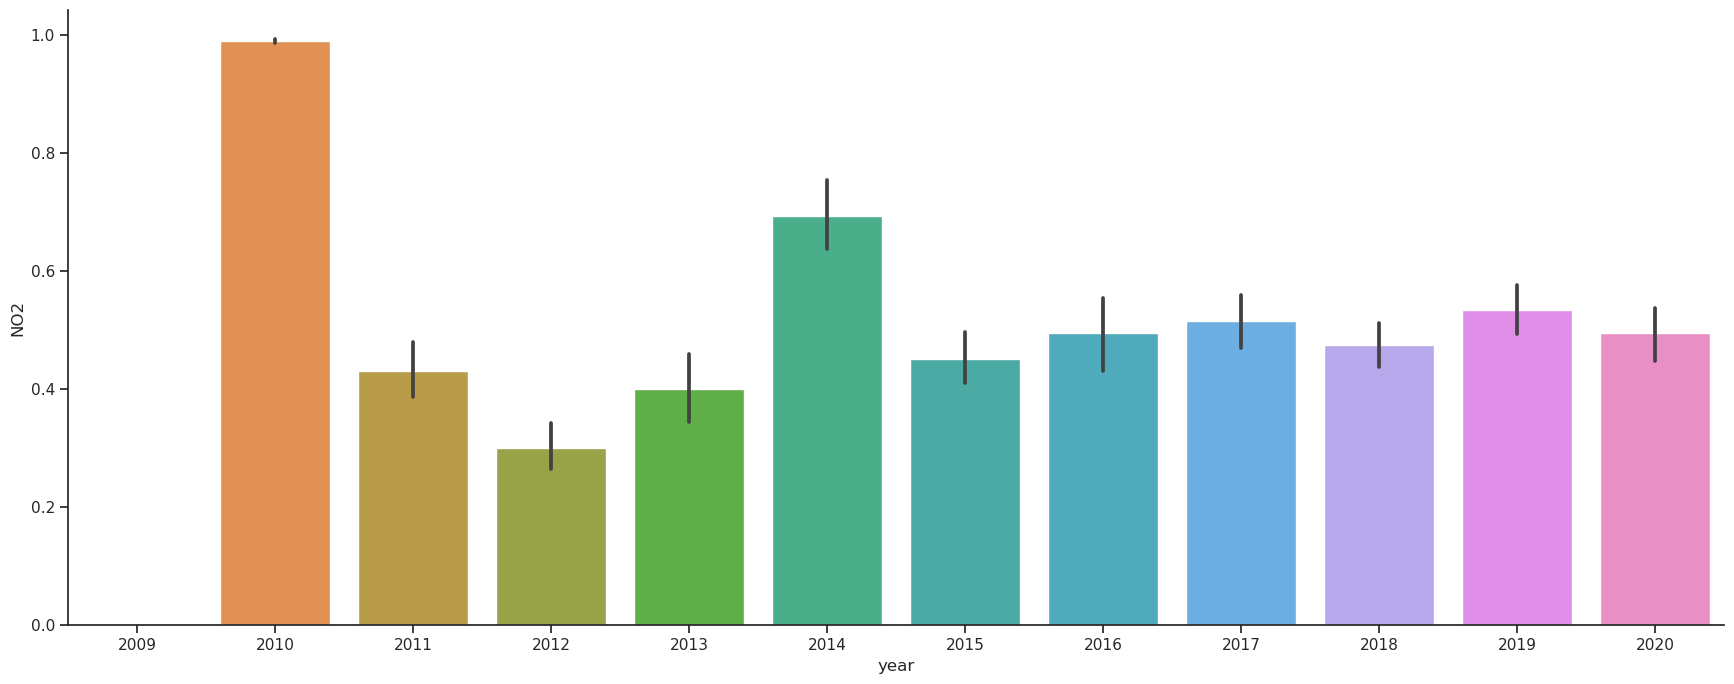

In [26]:
variable = "NO2"
ax = sns.catplot(y=variable, x="year", kind="bar", data=PTF_fill, height=7, aspect=2.5)

In [27]:
PTF_March_June = PTF_fill.loc[(PTF_fill.year >= 2019) & (PTF_fill.month <= 6) & (PTF_fill.month >= 3)]
PTF_March_June

,LON,LAT,BDEPTH,DEPTH,TEMP,SAL,DENS,O2per,O2mll,pH,...,NH3,NO2,NO3,SiO4,PO4,SECCHI,CHLA,PHAEO,year,month
DATE,,,,,,,,,,,,,,,,,,,,,
2019-04-10,12.51,45.31,17,0.5,13.3802,36.3893,29.6115,105.44493,6.14801,8.03,...,0.010000,1.150000,4.900000,5.840000,0.080000,2.400000,0.880000,0.320000,2019,4
2019-04-10,12.51,45.31,17,1.0,13.2622,36.5490,29.6115,106.30485,6.20691,8.03,...,0.023030,1.126970,4.759697,5.766364,0.079394,2.476471,0.882424,0.318485,2019,4
2019-04-10,12.51,45.31,17,1.5,13.1418,36.7305,29.6115,106.90035,6.24993,8.03,...,0.036061,1.103939,4.619394,5.692727,0.078788,2.552941,0.884848,0.316970,2019,4
2019-04-10,12.51,45.31,17,2.0,13.0851,36.8399,29.6115,107.52580,6.28948,8.03,...,0.049091,1.080909,4.479091,5.619091,0.078182,2.629412,0.887273,0.315455,2019,4
2019-04-10,12.51,45.31,17,2.5,12.9536,37.0232,29.6115,107.33856,6.28820,8.03,...,0.062121,1.057879,4.338788,5.545455,0.077576,2.705882,0.889697,0.313939,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-10,12.51,45.31,20,17.0,17.3225,37.4023,29.6115,102.56979,5.09493,8.03,...,0.437568,0.226486,6.002432,5.613243,0.090000,5.578947,2.028649,0.550000,2020,6
2020-06-10,12.51,45.31,20,17.5,17.0675,37.5406,29.6115,97.67811,5.09328,8.03,...,0.435676,0.204865,5.474324,5.332432,0.090000,5.663158,2.016486,0.550000,2020,6
2020-06-10,12.51,45.31,20,18.0,16.9602,37.5970,29.6115,94.86617,5.07660,8.03,...,0.433784,0.183243,4.946216,5.051622,0.090000,5.747368,2.004324,0.550000,2020,6


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


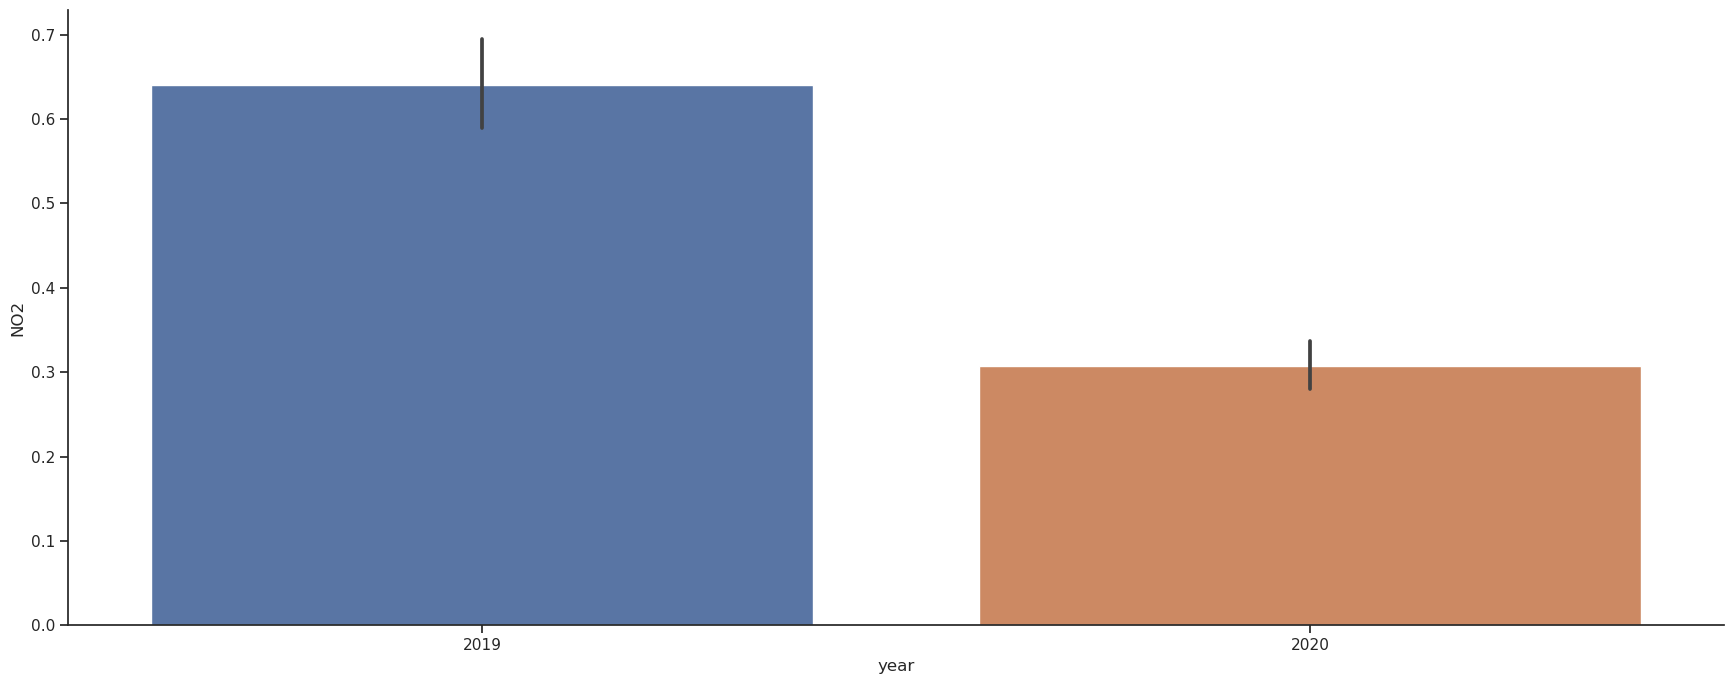

In [28]:
variable = "NO2"
ax = sns.catplot(y=variable, x="year", kind="bar", data=PTF_March_June, height=7, aspect=2.5)

In [29]:
PTF_2019 = PTF_March_June.loc[PTF_March_June.year == 2019].groupby("year").mean()
PTF_2020 = PTF_March_June.loc[PTF_March_June.year == 2020].groupby("year").mean()

ratio_PTF = PTF_2019["NO2"].values / PTF_2020["NO2"].values
ratio_PTF

array([2.08150227])

### Plot NO2 from air-quality forecasts over the Venice Lagoon

In [30]:
def plot_stats(variable, lat, lon, df): 
    dt = df.sel(latitude=lat, longitude=lon, method="nearest").to_dataframe()
    dt.reset_index(inplace=True)
    dt['datetime'] = pd.DatetimeIndex(dt['time']).year
    dt["year"] = pd.DatetimeIndex(dt['time']).year
    dt = dt.groupby("datetime").mean()
    dt['name'] = 'Venice Lagoon'
    ax = sns.catplot(x="name", y=variable, hue="year", kind="bar", data=dt, height=7, aspect=2.5)
    
    ax.fig.suptitle('Total ' + variable + ' averaged (March-June) over the Venice Lagoon')
    return dt

/tmp/ipykernel_189/992754342.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt = dt.groupby("datetime").mean()
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


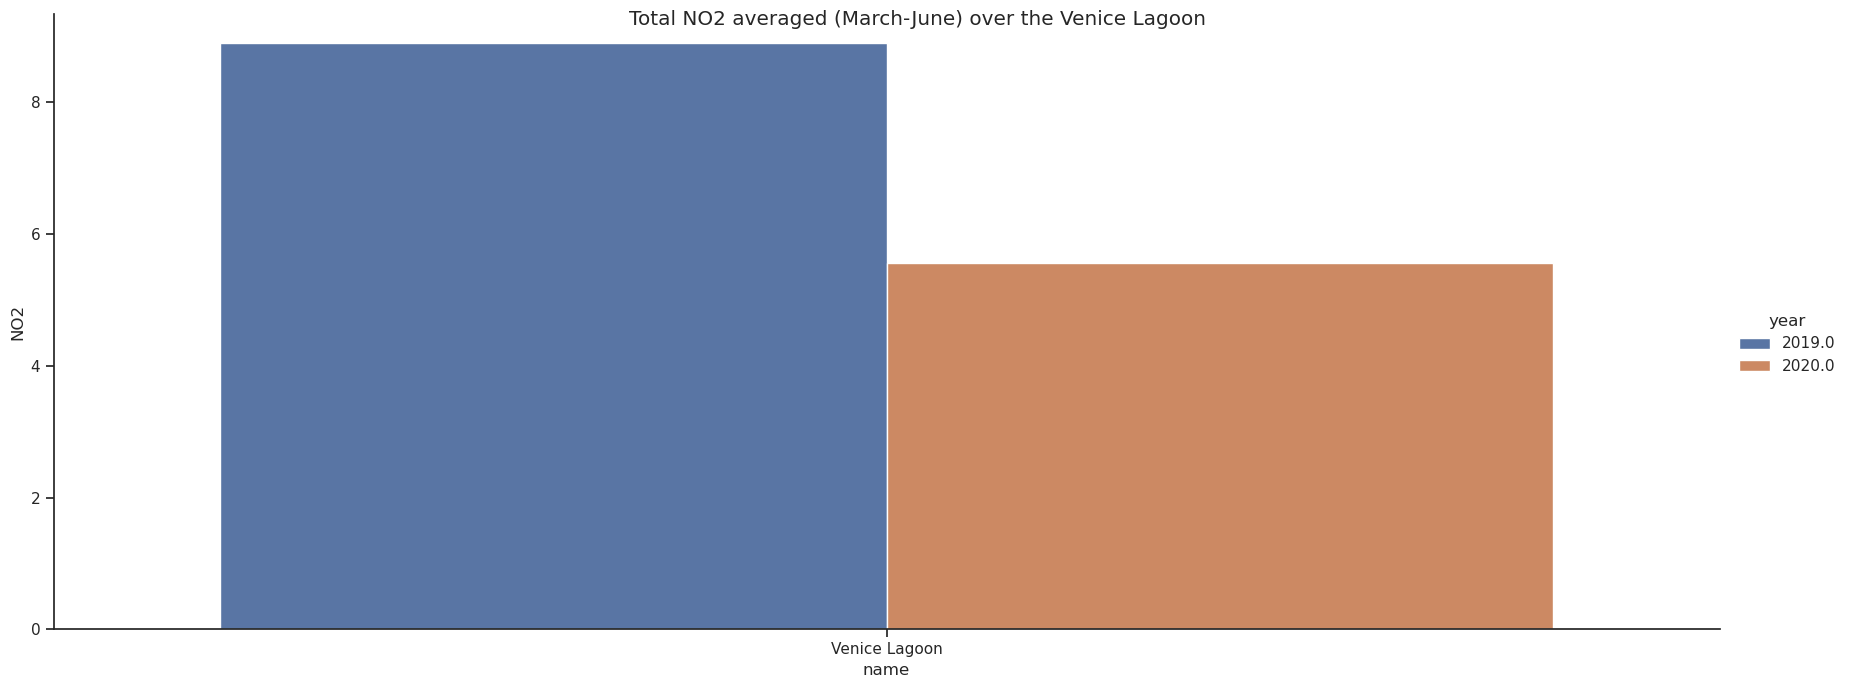

In [31]:
dd = plot_stats("NO2", PTF_March_June.LAT.mean(), PTF_March_June.LON.mean(), clipped.sel(time=slice("2019-01-01","2020-12-31")))

### Compute ratio between NO2 in 2019 and 2020

In [32]:
dd_2019 = dd.loc[dd['year'] == 2019]
dd_2020 = dd.loc[dd['year'] == 2020]

ratio_cams = dd_2019["NO2"].values / dd_2020["NO2"].values
ratio_cams

array([1.597712], dtype=float32)

In [33]:
print(ratio_PTF, ratio_cams)

[2.08150227] [1.597712]
